In [1]:
# importing packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import nltk
import string

# importing the data
mg = pd.read_csv('data/major_groups.csv')
pf = pd.read_csv('data/public_firms.csv')
ten_k = pd.read_csv('data/2020_10K_item1_full.csv')

In [2]:
# filtering to gather data on real estate industry
real_estate = pf[pf['sic'].astype(str).str.startswith('65')] # "Fix" prompt. GitHub Copilot, v1.235.0, GitHub, 25 September 2024, https://github.blog/changelog/label/copilot/.
real_estate

,gvkey,fyear,location,conm,ipodate,sic,prcc_c,ch,ni,asset,sale,roa
901,1233,1995,USA,ALASKA NORTHWEST PROPERTIES,NaN,6512,242.000,0.148,-0.098,9.754,0.313,-0.010047
1272,1332,1995,USA,ASIA SUPERNET CORP,NaN,6513,6.500,0.055,-1.973,1.724,0.634,-1.144432
1273,1332,1996,USA,ASIA SUPERNET CORP,NaN,6513,0.687,0.170,-2.288,10.625,2.050,-0.215341
1274,1332,1997,USA,ASIA SUPERNET CORP,NaN,6513,0.110,0.036,-1.393,2.388,0.347,-0.583333
1275,1332,1998,USA,ASIA SUPERNET CORP,NaN,6513,0.045,0.045,-1.077,1.216,0.307,-0.885691
...,...,...,...,...,...,...,...,...,...,...,...,...
207469,260774,2016,USA,CBRE GROUP INC,2004/06/10,6500,31.490,762.576,571.973,10779.587,13071.589,0.053061
207470,260774,2017,USA,CBRE GROUP INC,2004/06/10,6500,43.310,751.774,691.479,11483.830,14209.608,0.060213
207471,260774,2018,USA,CBRE GROUP INC,2004/06/10,6500,40.040,777.219,NaN,13456.793,NaN,NaN
207472,260774,2019,USA,CBRE GROUP INC,2004/06/10,6500,61.290,971.781,1282.357,16197.196,23894.091,0.079172


In [3]:
# Part A (3a): How many unique firm-year ("fyear") observations are there in the filtered dataset?
print(real_estate['fyear'].nunique())

27


In [4]:
# Part A (3b): How many unique firms are there in the filtered dataset?
print(real_estate['gvkey'].nunique())

248


In [5]:
# Part A (3c): How many firms in the filtered dataset have records over all 27 years (1994-2020)?
print(real_estate['gvkey'].value_counts().value_counts().loc[27])

3


In [6]:
# Part B (1): What are the top 10 firms with the highest stock price in the year 2020?
# "Fix" prompt. GitHub Copilot, v1.235.0, GitHub, 25 September 2024, https://github.blog/changelog/label/copilot/.
stock_price = real_estate[real_estate['fyear'] == 2020].sort_values('prcc_c',ascending=False).head(10)['prcc_c']
stock_price


140073    148.3700
81594     136.7600
96857      89.1300
201704     78.9300
113273     68.6300
69227      63.1200
207473     62.7200
116719     61.5400
57240      50.1569
49538      45.5500
Name: prcc_c, dtype: float64

In [7]:
# Part B (2): What are the top 10 firms with the highest sales in the entire history of the dataset?
sales = real_estate.sort_values('sale', ascending = False).head(10)['sale']
sales

207472    23894.091
140072    17983.200
140073    16589.900
140071    16318.400
207470    14209.608
207469    13071.589
207468    10855.810
116719    10724.776
114745     8751.000
114744     8219.900
Name: sale, dtype: float64

In [8]:
# question B(3): What is the geographical distribution of all the firms?
location_count = real_estate['location'].value_counts()
location_count.head(10)

location
USA    1898
CHN     141
ISR      81
CAN      67
ARG      46
MEX      14
BMU      12
MYS       9
HKG       8
DEU       7
Name: count, dtype: int64

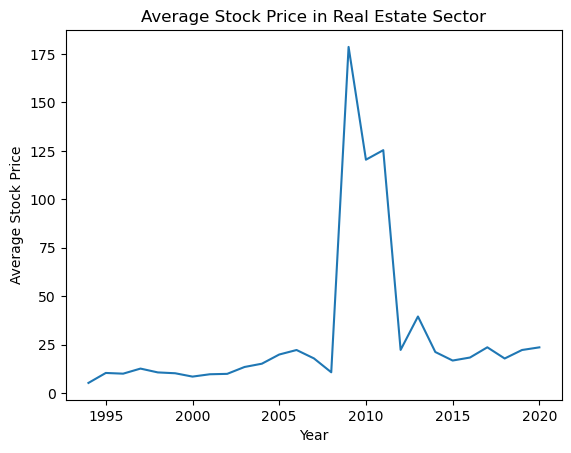

In [9]:
# question B(4): Create a line chart to show the average stock price in the selected sector(s) across the years
stock_price = real_estate.groupby('fyear')['prcc_c'].mean()
plt.plot(stock_price)
plt.ylabel('Average Stock Price')
plt.xlabel('Year')
plt.title('Average Stock Price in Real Estate Sector')
plt.show()

In [10]:
# question B(5): Which firm was affected the most by the 2008 Financial Crisis, as measured by the percentage drop in stock price from 2007 to 2008?
# "Fix" prompt. GitHub Copilot, v1.235.0, GitHub, 25 September 2024, https://github.blog/changelog/label/copilot/.
stock_price_2007 = real_estate[real_estate['fyear'] == 2007].groupby('conm')['prcc_c'].mean()
stock_price_2008 = real_estate[real_estate['fyear'] == 2008].groupby('conm')['prcc_c'].mean()
percentage_drop = (stock_price_2007 - stock_price_2008) / stock_price_2007 * 100
percentage_drop.sort_values(ascending = False).head(1)

conm
PILLARSTONE CAPITAL REIT    86.363636
Name: prcc_c, dtype: float64

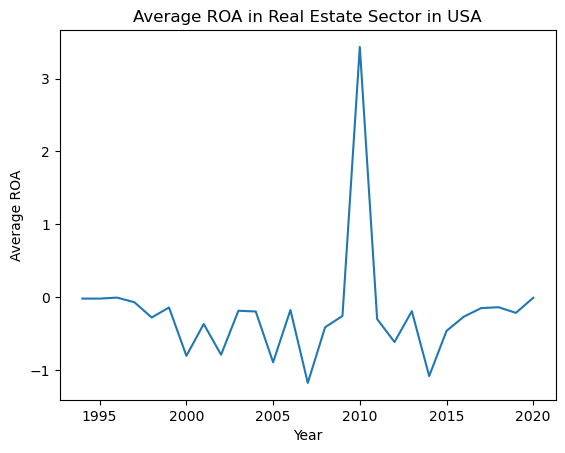

In [11]:
# question B(6): Plot the average Return on Assets (ROA) for the firms located in the “USA” across the years
roa_usa = real_estate[real_estate['location'] == 'USA'].groupby('fyear')['roa'].mean()
plt.plot(roa_usa)
plt.ylabel('Average ROA')
plt.xlabel('Year')
plt.title('Average ROA in Real Estate Sector in USA')
plt.show()

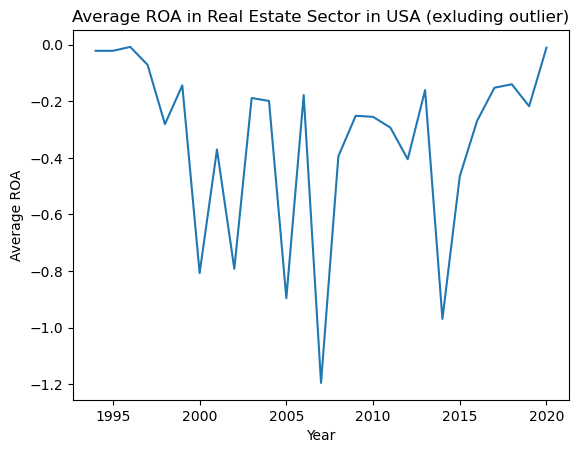

In [12]:
roa_usa_firm = real_estate[(real_estate['location'] == 'USA')]
roa_usa_firm = roa_usa_firm[roa_usa_firm['gvkey'] != 179208]
roa_usa_firm = roa_usa_firm.groupby('fyear')['roa'].mean()
plt.plot(roa_usa_firm)
plt.ylabel('Average ROA')
plt.xlabel('Year')
plt.title('Average ROA in Real Estate Sector in USA (exluding outlier)')
plt.show()

In [13]:
# question c

# importing packages
from nltk.corpus import stopwords
nltk.download('stopwords')

# cleaning the text
# function from Gene's notebook (nlp part2 keyword analysis)
translator = str.maketrans('', '', string.punctuation)
sw = stopwords.words('english')

def clean_text(text):
    ''' This function takes a string as input and 
        returns a cleaned version of the string
        Specifically, it makes the string into lower case and remove punctuations
    '''
    text_lower = text.lower() # make it lowercase
    text_no_punctuation = text_lower.translate(translator) # remove punctuation  
    clean_words = [w for w in text_no_punctuation.split() if w not in sw] # remove stopwords
    return ' '.join(clean_words)

ten_k['item_1_cleaned'] = ten_k['item_1_text'].apply(clean_text)
ten_k['item_1_cleaned']

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/eviexu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0       fixed expenses previosuly documented 8k 235000...
1       general hurco companies inc international indu...
2       engaged business developing marketing products...
3       corporate history chun capital group formerly ...
4       corporate history chun capital group formerly ...
                              ...                        
5476    general rf industries ltd together subsidiarie...
5477    background capital structure know labs inc inc...
5478    general gee group inc company us incorporated ...
5479    general gulfslope energy inc independent crude...
5480    general development business north european oi...
Name: item_1_cleaned, Length: 5481, dtype: object

In [14]:
# question D (1): creating a merged dataframe on selected sector
# "Fix" prompt. GitHub Copilot, v1.235.0, GitHub, 25 September 2024, https://github.blog/changelog/label/copilot/.
# reference: GeeksforGeeks. "Different Types of Joins in Pandas." GeeksforGeeks, 28 Mar. 2021, https://www.geeksforgeeks.org/different-types-of-joins-in-pandas/. Accessed 25 September 2024.

real_estate_merged = pd.merge(real_estate, ten_k[['gvkey', 'item_1_cleaned']], on='gvkey', how='inner')
real_estate_merged

,gvkey,fyear,location,conm,ipodate,sic,prcc_c,ch,ni,asset,sale,roa,item_1_cleaned
0,1545,1995,USA,AMERICAN REALTY INVESTORS,NaN,6512,14.750,1.054,-2.836,162.033,22.952,-0.017503,general used herein terms arl company us refer...
1,1545,1996,USA,AMERICAN REALTY INVESTORS,NaN,6512,13.000,1.254,-5.554,235.037,26.979,-0.023630,general used herein terms arl company us refer...
2,1545,1997,USA,AMERICAN REALTY INVESTORS,NaN,6512,14.375,5.347,-2.428,433.799,49.971,-0.005597,general used herein terms arl company us refer...
3,1545,1998,USA,AMERICAN REALTY INVESTORS,NaN,6512,16.375,11.523,-22.805,918.605,87.086,-0.024826,general used herein terms arl company us refer...
4,1545,1999,USA,AMERICAN REALTY INVESTORS,NaN,6512,17.000,2.479,10.298,919.546,193.980,0.011199,general used herein terms arl company us refer...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
791,260774,2016,USA,CBRE GROUP INC,2004/06/10,6500,31.490,762.576,571.973,10779.587,13071.589,0.053061,company overview cbre group inc delaware corpo...
792,260774,2017,USA,CBRE GROUP INC,2004/06/10,6500,43.310,751.774,691.479,11483.830,14209.608,0.060213,company overview cbre group inc delaware corpo...
793,260774,2018,USA,CBRE GROUP INC,2004/06/10,6500,40.040,777.219,NaN,13456.793,NaN,NaN,company overview cbre group inc delaware corpo...
794,260774,2019,USA,CBRE GROUP INC,2004/06/10,6500,61.290,971.781,1282.357,16197.196,23894.091,0.079172,company overview cbre group inc delaware corpo...


In [15]:
# question D(2): Generate the top 10 keywords for each firm based on two different methods: word counts and TF-IDF scores
# insipiration from Gene's notebook (nlp part2 keyword analysis & nlp part3 tfidf analysis)

# importing packages
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer

# word counts method
words = ' '.join(real_estate_merged['item_1_cleaned']).split()    # "Fix" prompt. GitHub Copilot, v1.235.0, GitHub, 25 September 2024, https://github.blog/changelog/label/copilot/
word_count = Counter(words)
top_keyword_count = word_count.most_common(10)
print(top_keyword_count)

# TF-IDF score method
vectoriser = TfidfVectorizer()
tfidf_matrix = vectoriser.fit_transform(real_estate_merged['item_1_cleaned'])
feature_names_cleaned = vectoriser.get_feature_names_out()
keyword_tfidf = pd.Series(tfidf_matrix.sum(axis=0).A1, index=feature_names_cleaned).sort_values(ascending=False)
top_10_tfidf = keyword_tfidf.head(10)
print(top_10_tfidf)


[('company', 24124), ('property', 18411), ('real', 18261), ('2019', 16954), ('estate', 16628), ('properties', 14553), ('management', 13724), ('services', 12800), ('business', 12592), ('may', 12447)]
company        81.646649
real           46.782102
property       45.183145
estate         42.994132
properties     41.548518
2019           38.842128
management     37.257569
annualized     32.644544
development    32.181209
services       31.977370
dtype: float64


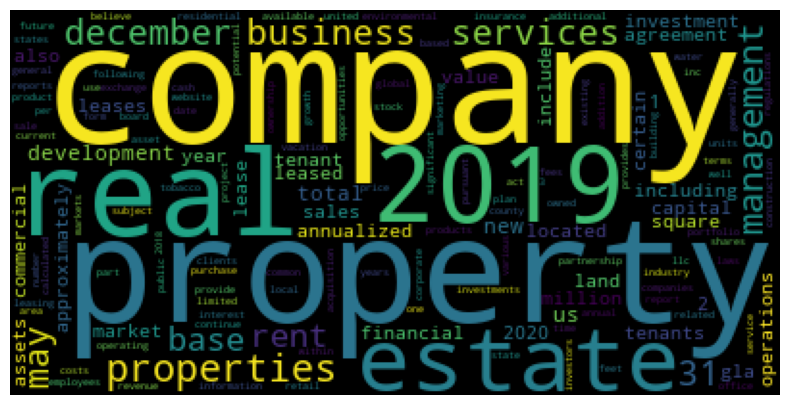

In [16]:
# question D(3): Create two wordclouds to visualize the keywords across all firms in the selected sector(s): one based on the word counts and another based on the TF-IDF scores

# importing packages
from wordcloud import WordCloud

# word count wordcloud
wordcloud_wordcount = WordCloud().generate_from_frequencies(word_count)

plt.figure(figsize=(10,5))
plt.axis('off')
plt.imshow(wordcloud_wordcount)
# plt.savefig('keyword_wordcount.png')
plt.show()

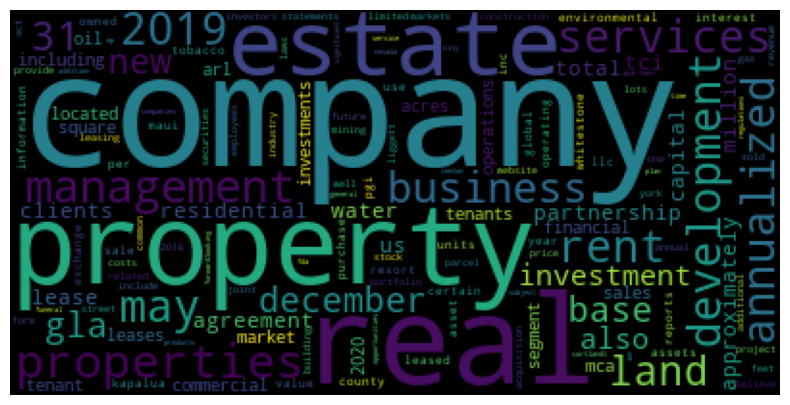

In [17]:
#  question D(3) continued

# TF-IDF wordcloud
wordcloud_tfidf = WordCloud().generate_from_frequencies(keyword_tfidf)

plt.figure(figsize=(10,5))
plt.axis('off')
plt.imshow(wordcloud_tfidf)
# plt.savefig('keyword_tfidf.png')
plt.show()

In [19]:
# Question E: Train a word2vec model with the full 10-K sample
import gensim
from gensim.models import Word2Vec

In [20]:
# Training a word2vec model with the full 10-K sample
# codes taken from Gene's jupyter notebook nlp part 4 word2vec
sentences = [text.split() for text in real_estate_merged['item_1_cleaned']]
word2vec = Word2Vec(sentences, vector_size=100, window=5, min_count=5, workers=4, sg=0) 

In [21]:
# Utilise the trained word2vec model to find the most relevant five words for investment
word2vec.wv.most_similar('investment', topn=5)

[('investments', 0.4253804385662079),
 ('asset', 0.39427649974823),
 ('investors', 0.3857770264148712),
 ('belief', 0.36140015721321106),
 ('risk', 0.359234094619751)]

In [22]:
# finding the most relevant five words for development
word2vec.wv.most_similar('development', topn=5)

[('entitlements', 0.3875052332878113),
 ('broadbased', 0.3806373178958893),
 ('construction', 0.36480775475502014),
 ('entitlement', 0.3579576313495636),
 ('projects', 0.35592857003211975)]

In [23]:
# finding the most relevant five words for properties
word2vec.wv.most_similar('properties', topn=5)

[('activities', 0.43208470940589905),
 ('acquire', 0.4216544032096863),
 ('thirdparty', 0.421053022146225),
 ('property', 0.3968958258628845),
 ('projects', 0.38582003116607666)]

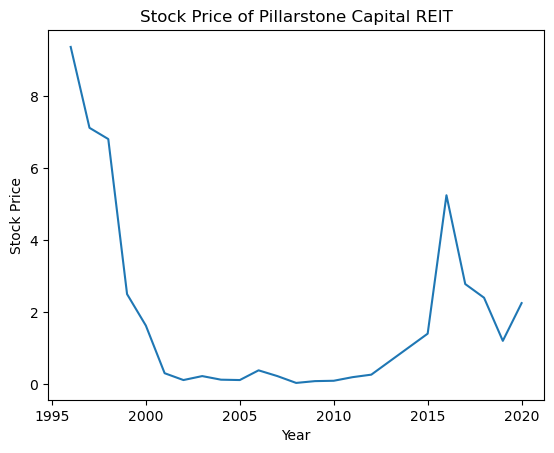

In [24]:
# Question F: Perform an analysis of the historical stock prices, ROA, revenue, and assets of the chosen firm

# stock price of Pillarstone Capital REIT
pillarstone = real_estate[real_estate['conm'] == 'PILLARSTONE CAPITAL REIT']
plt.plot(pillarstone['fyear'], pillarstone['prcc_c'])
plt.xlabel('Year')
plt.ylabel('Stock Price')
plt.title('Stock Price of Pillarstone Capital REIT')
plt.show()

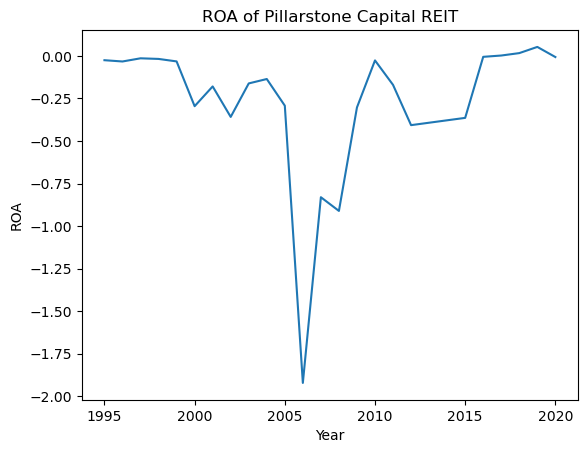

In [25]:
# ROA of Pillarstone Capital REIT
plt.plot(pillarstone['fyear'], pillarstone['roa'])
plt.xlabel('Year')
plt.ylabel('ROA')
plt.title('ROA of Pillarstone Capital REIT')
plt.show()

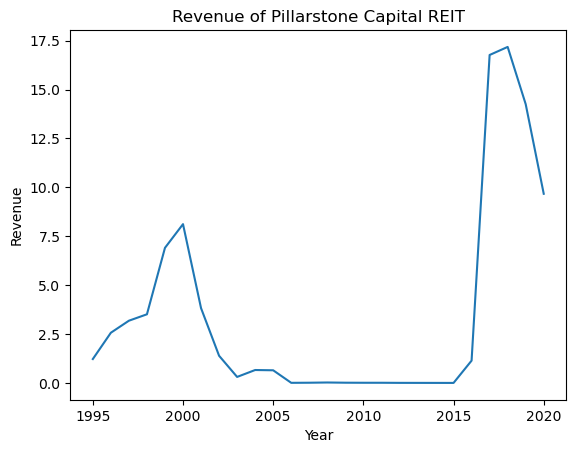

In [26]:
# revenue of Pillarstone Capital REIT
plt.plot(pillarstone['fyear'], pillarstone['sale'])
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.title('Revenue of Pillarstone Capital REIT')
plt.show()

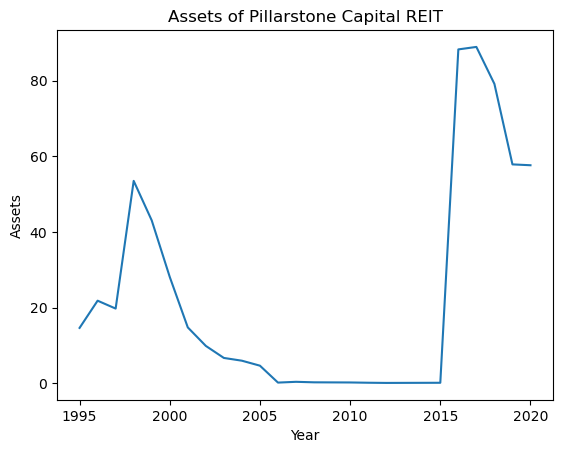

In [27]:
# assets of Pillarstone Capital REIT
plt.plot(pillarstone['fyear'], pillarstone['asset'])
plt.xlabel('Year')
plt.ylabel('Assets')
plt.title('Assets of Pillarstone Capital REIT')
plt.show()